In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.decomposition import PCA

In [2]:
mass = pd.read_csv('data/massbalance_fixdate.csv')
mass = mass.fillna(0)
mass = mass.iloc[2:]

# Convert 'glacier_area' column to numerical values
mass['glacier area'] = pd.to_numeric(mass['glacier area'])

# Sorting the DataFrame by 'glacier_area' in descending order
sorted_mass = mass.sort_values(by='glacier area', ascending=False)
pd.set_option('display.max_rows', None)

print(sorted_mass[['glacier name', 'glacier area']])

                    glacier name  glacier area
339     Grosser Aletschgletscher      91.81500
352     Grosser Aletschgletscher      91.81500
337     Grosser Aletschgletscher      91.81500
336     Grosser Aletschgletscher      91.81500
338     Grosser Aletschgletscher      91.81500
362     Grosser Aletschgletscher      91.81500
361     Grosser Aletschgletscher      91.81500
360     Grosser Aletschgletscher      91.81500
359     Grosser Aletschgletscher      91.81500
358     Grosser Aletschgletscher      91.81500
356     Grosser Aletschgletscher      91.81500
355     Grosser Aletschgletscher      91.81500
354     Grosser Aletschgletscher      91.81500
353     Grosser Aletschgletscher      91.81500
357     Grosser Aletschgletscher      91.81500
351     Grosser Aletschgletscher      91.81500
345     Grosser Aletschgletscher      91.81500
350     Grosser Aletschgletscher      91.81500
341     Grosser Aletschgletscher      91.81500
342     Grosser Aletschgletscher      91.81500
343     Gross

# Grosser Aletschgletscher

## Weather

In [3]:
temp_GA = pd.read_csv('data/open-meteo-glosseraletschgletscher.csv')

# Rename the column
temp_GA = temp_GA.rename(columns={'daily time': 'start date of observation'})

temp_GA = temp_GA.fillna(0)

temp_GA.head()

,start date of observation,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h)
0,1940-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1940-01-02,0.0,-17.5,-24.6,-19.8,0.0,0.0,0.0,0
2,1940-01-03,1.0,-13.0,-18.3,-15.7,0.0,0.0,0.0,0
3,1940-01-04,73.0,-12.1,-16.2,-14.6,1.0,0.0,0.7,5
4,1940-01-05,3.0,-10.7,-14.8,-12.8,0.0,0.0,0.0,0


## Length Change

In [4]:
length = pd.read_csv('data/lengthchange.csv')
length = length.replace(to_replace={'quality of start date':'x', 'quality of end date':'x', 'observer':'-'}, value=0).fillna(0)
length = length.iloc[2:]

# Convert column to numeric
length['length change'] = pd.to_numeric(length['length change'], errors='coerce')
length['elevation of glacier tongue'] = pd.to_numeric(length['elevation of glacier tongue'], errors='coerce')

length = length[length['glacier name']=='Grosser Aletschgletscher']

# Select specific columns
length = length[['start date of observation', 'length change', 'elevation of glacier tongue']]

display(length) 

,start date of observation,length change,elevation of glacier tongue
5185,1870-09-01,-75.0,0.0
5186,1886-09-01,-100.0,0.0
5187,1892-09-01,-5.0,0.0
5188,1893-09-01,-7.0,0.0
5189,1894-09-01,-6.0,0.0
5190,1895-09-01,-5.0,0.0
5191,1896-09-01,-6.0,0.0
5192,1897-09-01,-10.0,0.0
5193,1898-09-01,-16.0,0.0
5194,1899-09-01,-30.0,0.0


## Mass Balance

In [5]:
mass = pd.read_csv('data/massbalance_fixdate.csv')
mass = mass.fillna(0)
mass = mass.iloc[2:]

mass = mass[mass['glacier name']=='Grosser Aletschgletscher']

mass = mass[['start date of observation', 'summer mass balance', 'equilibrium line altitude', 'accumulation area ratio', 'glacier area', 'minimum elevation of glacier', 'maximum elevation of glacier']]

# Convert to numeric
mass['summer mass balance'] = pd.to_numeric(mass['summer mass balance'], errors='coerce')
mass['equilibrium line altitude'] = pd.to_numeric(mass['equilibrium line altitude'], errors='coerce')
mass['accumulation area ratio'] = pd.to_numeric(mass['accumulation area ratio'], errors='coerce')
mass['glacier area'] = pd.to_numeric(mass['glacier area'], errors='coerce')
mass['minimum elevation of glacier'] = pd.to_numeric(mass['minimum elevation of glacier'], errors='coerce')
mass['maximum elevation of glacier'] = pd.to_numeric(mass['maximum elevation of glacier'], errors='coerce')

display(mass)

,start date of observation,summer mass balance,equilibrium line altitude,accumulation area ratio,glacier area,minimum elevation of glacier,maximum elevation of glacier
336,1914-10-01,-1122,2825,70,91.8150,1519,4090
337,1915-10-01,-616,2715,76,91.8150,1519,4090
338,1916-10-01,-2011,2995,59,91.8150,1519,4090
339,1917-10-01,-956,2805,72,91.8150,1519,4090
340,1918-10-01,-1348,2795,73,91.8150,1519,4090
341,1919-10-01,-1666,2885,66,91.8150,1519,4090
342,1920-10-01,-2431,3305,34,91.8150,1519,4090
343,1921-10-01,-1832,3025,56,91.8150,1519,4090
344,1922-10-01,-1919,3155,47,91.8150,1519,4090
345,1923-10-01,-1359,2885,66,91.8150,1519,4090


## Elevation

In [6]:
elevation = pd.read_csv(('data/massbalance_fixdate_elevationbins.csv'))
elevation = elevation.fillna(0)
elevation = elevation.iloc[2:]

elevation = elevation[elevation['glacier name']=='Grosser Aletschgletscher']

elevation = elevation[['start date of observation', 'annual mass balance', 'area of elevation bin', 'upper elevation of bin']]

# Convert start date of observation to datetime 
elevation['start date of observation'] = pd.to_datetime(elevation['start date of observation'])

# Convert 'annual mass balance', 'area of elevation bin', and 'upper elevation of bin' to numeric
elevation['annual mass balance'] = pd.to_numeric(elevation['annual mass balance'], errors='coerce')
elevation['area of elevation bin'] = pd.to_numeric(elevation['area of elevation bin'], errors='coerce')
elevation['upper elevation of bin'] = pd.to_numeric(elevation['upper elevation of bin'], errors='coerce')

display(elevation)

,start date of observation,annual mass balance,area of elevation bin,upper elevation of bin
2503,1914-10-01,-12036,0.0275,1600
2504,1914-10-01,-9441,0.1650,1700
2505,1914-10-01,-10209,0.3525,1800
2506,1914-10-01,-8972,0.6750,1900
2507,1914-10-01,-7891,0.8425,2000
2508,1914-10-01,-7049,1.7900,2100
2509,1914-10-01,-6034,1.5475,2200
2510,1914-10-01,-4808,3.2075,2300
2511,1914-10-01,-3960,2.6275,2400
2512,1914-10-01,-2751,3.3650,2500


In [7]:
elevation['start date of observation'] = pd.to_datetime(elevation['start date of observation'])

# Pivot the data to get 'upper elevation of bin' as columns, dates as index
pivot_elevation = elevation.pivot(index='start date of observation', columns='upper elevation of bin', values='annual mass balance').copy()

# Convert all columns except 'upper elevation of bin' to numeric
pivot_elevation = pivot_elevation.apply(pd.to_numeric, errors='coerce')
pivot_elevation.fillna(0, inplace=True)

pivot_elevation.head()

upper elevation of bin,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,...,3200,3300,3400,3500,3600,3700,3800,3900,4000,4100
start date of observation,,,,,,,,,,,,,,,,,,,,,
1914-10-01,-12036.0,-9441.0,-10209.0,-8972.0,-7891.0,-7049.0,-6034.0,-4808.0,-3960.0,-2751.0,...,1500.0,1796.0,2061.0,2215.0,2200.0,2046.0,1860.0,1623.0,1358.0,1146.0
1915-10-01,-10290.0,-7900.0,-8449.0,-7243.0,-6154.0,-5325.0,-4401.0,-3328.0,-2580.0,-1527.0,...,1846.0,2067.0,2274.0,2375.0,2304.0,2103.0,1884.0,1633.0,1360.0,1141.0
1916-10-01,-13706.0,-10977.0,-12132.0,-10944.0,-9931.0,-9261.0,-8310.0,-7140.0,-6328.0,-4986.0,...,767.0,1174.0,1571.0,1839.0,1918.0,1839.0,1713.0,1518.0,1284.0,1086.0
1917-10-01,-11412.0,-8806.0,-9539.0,-8259.0,-7120.0,-6316.0,-5346.0,-4219.0,-3458.0,-2268.0,...,1419.0,1687.0,1953.0,2097.0,2069.0,1899.0,1708.0,1487.0,1253.0,1057.0
1918-10-01,-11013.0,-8435.0,-9217.0,-8032.0,-6927.0,-6146.0,-5219.0,-4144.0,-3451.0,-2302.0,...,1585.0,1879.0,2197.0,2398.0,2401.0,2241.0,2057.0,1823.0,1546.0,1315.0


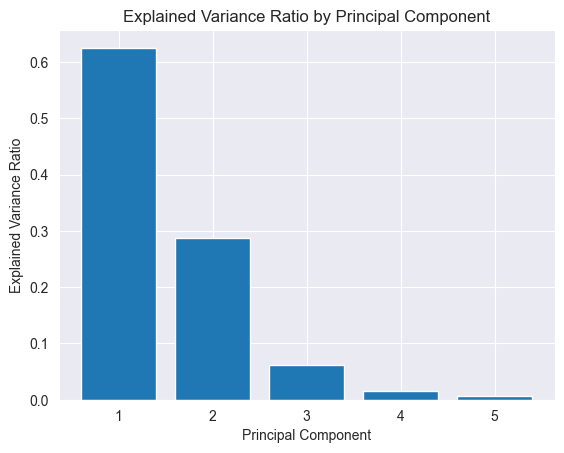

In [8]:
"""
Apply PCA to data
"""
# Initialize PCA model 
pca = PCA(n_components=5)

# Fit the model to the data
pca.fit(pivot_elevation)

# Plot the explained variance ratio
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [9]:
# Find the most representative column for PC1 and PC2 and PC3
# Get the absolute value of the loading scores
loading_scores = np.abs(pca.components_)

# Get the index of the most important feature on PC1
most_important_index_pc1 = np.argmax(loading_scores[0])
# Get the index of the most important feature on PC2
most_important_index_pc2 = np.argmax(loading_scores[1])
# Get the index of the most important feature on PC3
most_important_index_pc3 = np.argmax(loading_scores[2])

# Get the column name corresponding to the most important feature
most_important_feature_pc1 = pivot_elevation.columns[most_important_index_pc1]
most_important_feature_pc2 = pivot_elevation.columns[most_important_index_pc2]
most_important_feature_pc3 = pivot_elevation.columns[most_important_index_pc3]

print(f"The most important feature for PC1 is: {most_important_feature_pc1}")
print(f"The most important feature for PC2 is: {most_important_feature_pc2}")
print(f"The most important feature for PC3 is: {most_important_feature_pc3}")

# > Result is 1600, 1600, 2900, so we take 1700 and 2900 elevation bins.

bins_1700 = elevation[elevation['upper elevation of bin'] == 1700].copy()
bins_2900 = elevation[elevation['upper elevation of bin'] == 2900].copy()

The most important feature for PC1 is: 1600
The most important feature for PC2 is: 1600
The most important feature for PC3 is: 2900


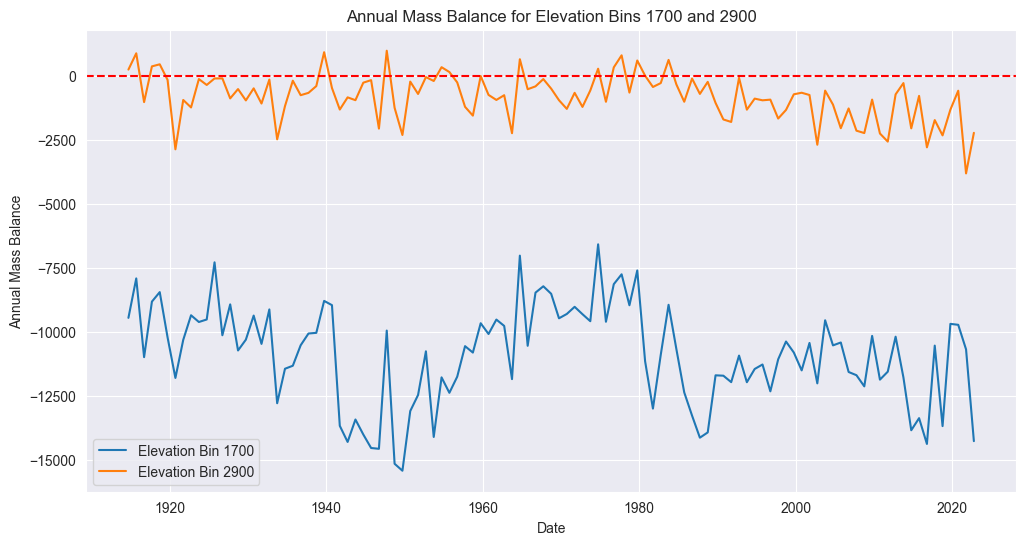

In [10]:
"""
Plotting mass balance for 1700 and 2900

Since the mass balance data is recorded over time, it is useful to visualise how the mass balance changes over time for the two elevation bins. This can help identify any trends or patterns in the data.
"""
# Plot the data for the 1700 and 2900 elevation bins
plt.figure(figsize=(12, 6))
plt.plot(bins_1700['start date of observation'], bins_1700['annual mass balance'], label='Elevation Bin 1700')
plt.plot(bins_2900['start date of observation'], bins_2900['annual mass balance'], label='Elevation Bin 2900')
plt.xlabel('Date')
plt.ylabel('Annual Mass Balance')

# Add a red line at 0
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Annual Mass Balance for Elevation Bins 1700 and 2900')
plt.legend()
plt.show()

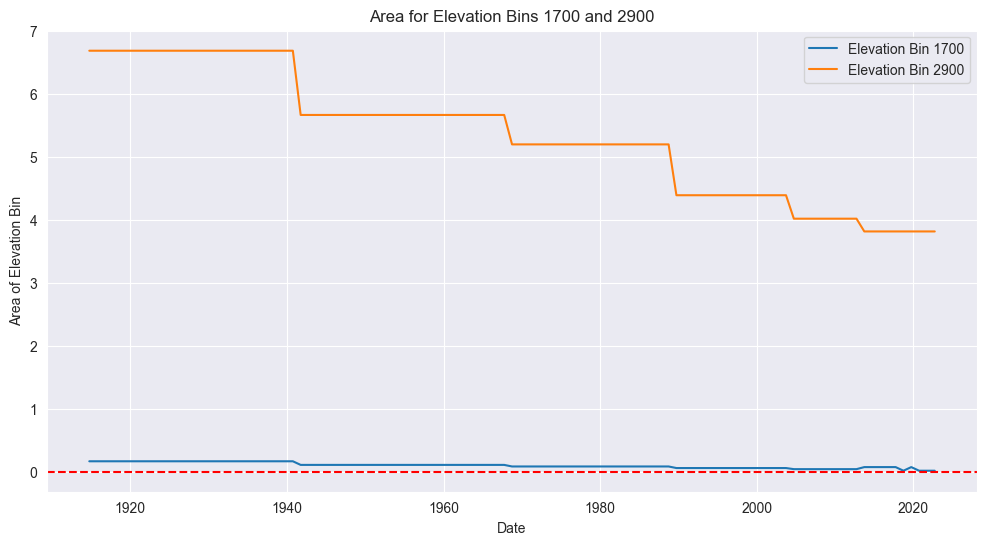

In [11]:
# Plot the data for the 1700 and 2900 elevation bins
plt.figure(figsize=(12, 6))
plt.plot(bins_1700['start date of observation'], bins_1700['area of elevation bin'], label='Elevation Bin 1700')
plt.plot(bins_2900['start date of observation'], bins_2900['area of elevation bin'], label='Elevation Bin 2900')
plt.xlabel('Date')
plt.ylabel('Area of Elevation Bin')

# Add a red line at 0
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Area for Elevation Bins 1700 and 2900')
plt.legend()
plt.show()

## Correlation Assessment

In [12]:
temp_GA['start date of observation'] = pd.to_datetime(temp_GA['start date of observation']).apply(lambda x: x.year)

# Reproject to year data (compute mean of all columns for each year) 
# date = index bcs groupby on index but don't want index so reset index
temp_GA = temp_GA.groupby('start date of observation').mean().reset_index()

# Convert each start date of observation to only year
length['start date of observation'] = pd.to_datetime(length['start date of observation']).apply(lambda x: x.year)
mass['start date of observation'] = pd.to_datetime(mass['start date of observation']).apply(lambda x: x.year)
bins_1700['start date of observation'] = pd.to_datetime(bins_1700['start date of observation']).apply(lambda x: x.year)
bins_2900['start date of observation'] = pd.to_datetime(bins_2900['start date of observation']).apply(lambda x: x.year)

# Reset index on all
length.reset_index(drop = True, inplace = True)
mass.reset_index(drop = True, inplace = True)
bins_1700.reset_index(drop = True, inplace = True)
bins_2900.reset_index(drop = True, inplace = True)

In [13]:
# Merging datasets
data_GA = pd.merge(temp_GA, length, on='start date of observation', how='inner')
data_GA = pd.merge(data_GA, mass, on='start date of observation', how='inner')
data_GA = pd.merge(data_GA, bins_1700, on='start date of observation', how='inner')
data_GA = pd.merge(data_GA, bins_2900, on='start date of observation', how='inner')

# Saving data_GA as a CSV file
data_GA.to_csv('data/data_GA.csv', index=False)

<Axes: >

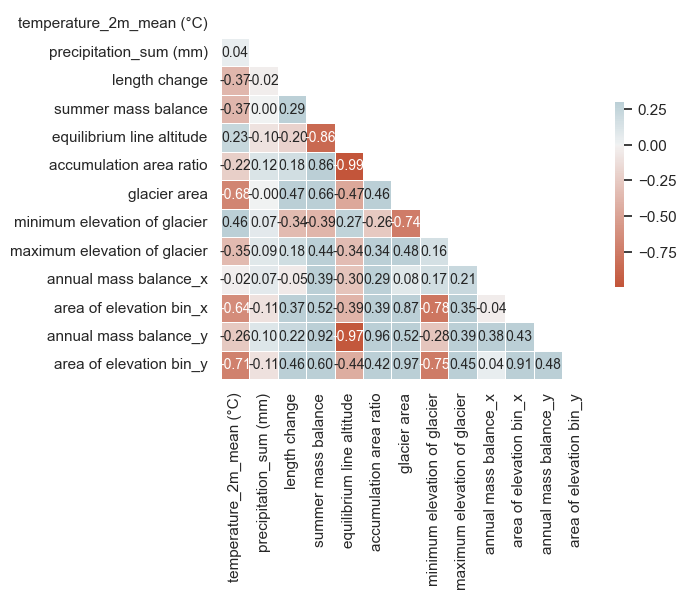

In [14]:
data_GA.set_index('start date of observation', inplace=True)

# Keep columns
data_GA = data_GA[['temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'length change', 'summer mass balance', 'equilibrium line altitude', 'accumulation area ratio', 'glacier area', 'minimum elevation of glacier', 'maximum elevation of glacier', 'annual mass balance_x', 'area of elevation bin_x', 'annual mass balance_y', 'area of elevation bin_y']]

# Compute cross-correlation between all tuples of columns
correlation_matrix = data_GA.corr()

# Create the heat map
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 10})

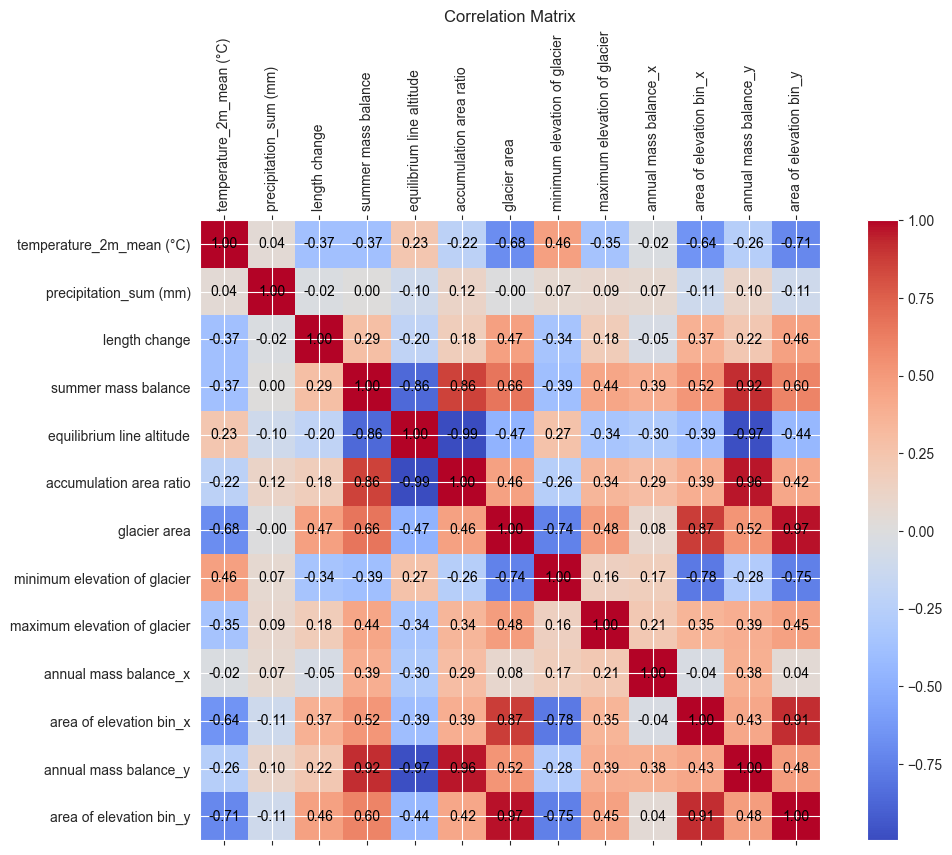

In [16]:
data_GA.set_index('start date of observation', inplace=True)

# Keep columns
data_GA = data_GA[['temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'length change', 'summer mass balance', 'equilibrium line altitude', 'accumulation area ratio', 'glacier area', 'minimum elevation of glacier', 'maximum elevation of glacier', 'annual mass balance_x', 'area of elevation bin_x', 'annual mass balance_y', 'area of elevation bin_y']]

# Compute cross-correlation between all tuples of columns
correlation_matrix = data_GA.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')

# Add correlation value on grid
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()